In [83]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.preprocessing import LabelEncoder


###**Reading the data sets**

In [84]:
import pandas as pd
train_data=pd.read_csv('/content/train.csv')
test_data=pd.read_csv('/content/test.csv')

In [85]:
train_data.head()

,ID,y,X0,X1,X2,X3,X4,X5,X6,X8,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,0,130.81,k,v,at,a,d,u,j,o,...,0,0,1,0,0,0,0,0,0,0
1,6,88.53,k,t,av,e,d,y,l,o,...,1,0,0,0,0,0,0,0,0,0
2,7,76.26,az,w,n,c,d,x,j,x,...,0,0,0,0,0,0,1,0,0,0
3,9,80.62,az,t,n,f,d,x,l,e,...,0,0,0,0,0,0,0,0,0,0
4,13,78.02,az,v,n,f,d,h,d,n,...,0,0,0,0,0,0,0,0,0,0


In [86]:
test_data.head()

,ID,X0,X1,X2,X3,X4,X5,X6,X8,X10,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,1,az,v,n,f,d,t,a,w,0,...,0,0,0,1,0,0,0,0,0,0
1,2,t,b,ai,a,d,b,g,y,0,...,0,0,1,0,0,0,0,0,0,0
2,3,az,v,as,f,d,a,j,j,0,...,0,0,0,1,0,0,0,0,0,0
3,4,az,l,n,f,d,z,l,n,0,...,0,0,0,1,0,0,0,0,0,0
4,5,w,s,as,c,d,y,i,m,0,...,1,0,0,0,0,0,0,0,0,0


In [87]:
print(train_data.shape)

(4209, 378)


In [88]:
print(test_data.shape)

(4209, 377)


In [89]:
for i in train_data.columns:
   data_type = train_data[i].dtype
   if data_type == 'object':
    print (i)

X0
X1
X2
X3
X4
X5
X6
X8


##Removing  the variables having zero variance

In [90]:
variance = pow(train_data.drop(columns={'ID', 'y'}).select_dtypes(include=np.number).std(),2).to_dict()
null_count = 0
for key, value in variance.items():
  if (value==0):
    print('NAME=', key)
    null_count=null_count+1
    print('Number of columns which has zero variance=', null_count)

NAME= X11
Number of columns which has zero variance= 1
NAME= X93
Number of columns which has zero variance= 2
NAME= X107
Number of columns which has zero variance= 3
NAME= X233
Number of columns which has zero variance= 4
NAME= X235
Number of columns which has zero variance= 5
NAME= X268
Number of columns which has zero variance= 6
NAME= X289
Number of columns which has zero variance= 7
NAME= X290
Number of columns which has zero variance= 8
NAME= X293
Number of columns which has zero variance= 9
NAME= X297
Number of columns which has zero variance= 10
NAME= X330
Number of columns which has zero variance= 11
NAME= X347
Number of columns which has zero variance= 12


In [91]:
train_data =train_data.drop(columns={'X11', 'X93','X107','X233','X235','X268','X289','X290','X293','X297','X330','X347'})
train_data.head()

,ID,y,X0,X1,X2,X3,X4,X5,X6,X8,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,0,130.81,k,v,at,a,d,u,j,o,...,0,0,1,0,0,0,0,0,0,0
1,6,88.53,k,t,av,e,d,y,l,o,...,1,0,0,0,0,0,0,0,0,0
2,7,76.26,az,w,n,c,d,x,j,x,...,0,0,0,0,0,0,1,0,0,0
3,9,80.62,az,t,n,f,d,x,l,e,...,0,0,0,0,0,0,0,0,0,0
4,13,78.02,az,v,n,f,d,h,d,n,...,0,0,0,0,0,0,0,0,0,0


In [92]:
train_data.shape

(4209, 366)

Check for Null and Unique values for test  and train data sets

In [93]:
train_data.isnull().sum().any()

False

Apply Label Encoder

In [94]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [95]:
train_data_feature = train_data.drop(columns={'y','ID'})
train_data_target = train_data.y

In [96]:
train_data_feature.head()

,X0,X1,X2,X3,X4,X5,X6,X8,X10,X12,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,k,v,at,a,d,u,j,o,0,0,...,0,0,1,0,0,0,0,0,0,0
1,k,t,av,e,d,y,l,o,0,0,...,1,0,0,0,0,0,0,0,0,0
2,az,w,n,c,d,x,j,x,0,0,...,0,0,0,0,0,0,1,0,0,0
3,az,t,n,f,d,x,l,e,0,0,...,0,0,0,0,0,0,0,0,0,0
4,az,v,n,f,d,h,d,n,0,0,...,0,0,0,0,0,0,0,0,0,0


In [97]:
train_data_target.head()

,y
0,130.81
1,88.53
2,76.26
3,80.62
4,78.02


In [98]:
print(train_data_feature.shape)

(4209, 364)


In [99]:
train_data_feature.describe(include='object')

,X0,X1,X2,X3,X4,X5,X6,X8
count,4209,4209,4209,4209,4209,4209,4209,4209
unique,47,27,44,7,4,29,12,25
top,z,aa,as,c,d,w,g,j
freq,360,833,1659,1942,4205,231,1042,277


In [100]:
le=LabelEncoder()
train_data_feature['X0']= le.fit_transform(train_data_feature.X0)
train_data_feature['X1']= le.fit_transform(train_data_feature.X1)
train_data_feature['X2']= le.fit_transform(train_data_feature.X2)
train_data_feature['X3']= le.fit_transform(train_data_feature.X3)
train_data_feature['X4']= le.fit_transform(train_data_feature.X4)
train_data_feature['X5']= le.fit_transform(train_data_feature.X5)
train_data_feature['X6']= le.fit_transform(train_data_feature.X6)
train_data_feature['X8']= le.fit_transform(train_data_feature.X8)



Performing Dimensionality Reduction

In [101]:
print(train_data_feature.shape)
print(train_data_target.shape)

(4209, 364)
(4209,)


In [102]:
train_data_feature.head()

,X0,X1,X2,X3,X4,X5,X6,X8,X10,X12,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,32,23,17,0,3,24,9,14,0,0,...,0,0,1,0,0,0,0,0,0,0
1,32,21,19,4,3,28,11,14,0,0,...,1,0,0,0,0,0,0,0,0,0
2,20,24,34,2,3,27,9,23,0,0,...,0,0,0,0,0,0,1,0,0,0
3,20,21,34,5,3,27,11,4,0,0,...,0,0,0,0,0,0,0,0,0,0
4,20,23,34,5,3,12,3,13,0,0,...,0,0,0,0,0,0,0,0,0,0


In [103]:
train_data_target.head()

,y
0,130.81
1,88.53
2,76.26
3,80.62
4,78.02


In [104]:
from sklearn.decomposition import PCA
pca=PCA(n_components=.95)
pca.fit(train_data_feature,train_data_target)

PCA(n_components=0.95)

In [105]:
train_data_feature_trans = pca.fit_transform(train_data_feature)
print(train_data_feature_trans.shape)

(4209, 6)


Predict test_df values using XGBoost

In [106]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,root_mean_squared_log_error, mean_squared_error # Added import for mean_squared_error
from math import sqrt

train_x,test_x,train_y,test_y = train_test_split(train_data_feature_trans,train_data_target,test_size=0.2,random_state=123)
print(train_x.shape)
print(train_y.shape)
print(test_x.shape)
print(test_y.shape)

xgb_reg=xgb.XGBRegressor(objective='reg:linear',colsample_bytree=0.3,learning_rate=0.1,max_depth=5,alpha=10,n_estimators=10)
model=xgb_reg.fit(train_x,train_y)
print('RMSE=',sqrt(mean_squared_error(model.predict(test_x),test_y)))

(3367, 6)
(3367,)
(842, 6)
(842,)
RMSE= 11.4531809040128


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [17:09:31] WARNING: /workspace/src/objective/regression_obj.cu:227: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


<Figure size 1000x500 with 0 Axes>

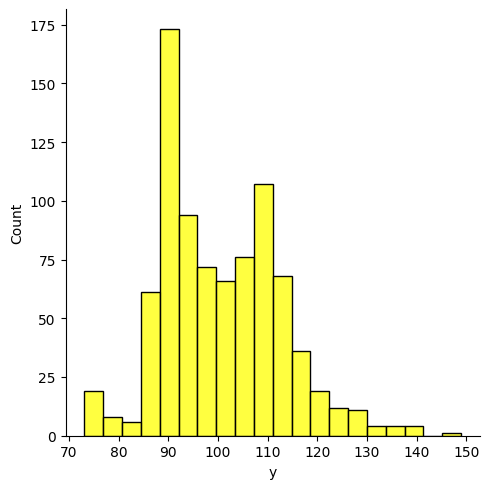

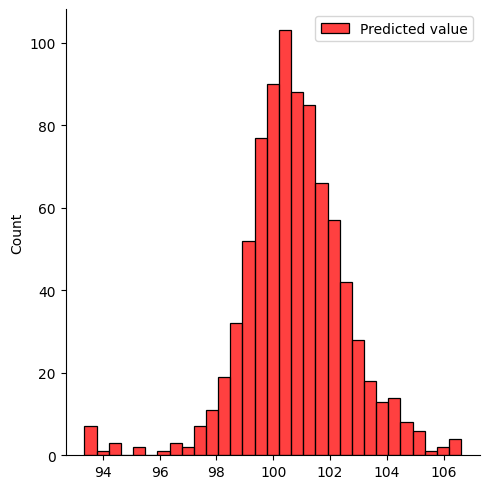

In [107]:
import matplotlib.pyplot as plt
import seaborn as sns
pred_test_y=model.predict(test_x)
plt.figure(figsize=(10,5))
sns.displot(test_y[test_y<150],color="yellow",label="Actual value")
sns.displot(pred_test_y[pred_test_y<150],color="red",label="Predicted value")
plt.legend()


K-fold cross validation using XGBoost

In [108]:
dmatrix_train=xgb.DMatrix(data=train_data_feature_trans,label=train_data_target)
params={'objective' : 'reg:linear','colsample_bytree':0.3,'learning_rate':0.1,'max_depth':5,'alpha':10}
model_cv=xgb.cv(dtrain=dmatrix_train,params=params,nfold=3,num_boost_round=50,early_stopping_rounds=10,metrics='rmse',as_pandas=True,seed=123)
model_cv.tail(7)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [17:09:32] WARNING: /workspace/src/objective/regression_obj.cu:227: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


,train-rmse-mean,train-rmse-std,test-rmse-mean,test-rmse-std
43,10.461623,0.221378,11.258390,0.334273
44,10.448943,0.222571,11.260817,0.335467
45,10.436644,0.221642,11.263581,0.334703
46,10.410006,0.223634,11.254065,0.338801
47,10.399956,0.223653,11.256815,0.338904
48,10.379567,0.225245,11.255239,0.339879
49,10.362123,0.228239,11.254753,0.340534


By using k-fold cross validation,RMSE is reduced by approximately 10%,RMSE=11.2

###Prediction on test data set using XGBoost

Preparing test dataset

In [109]:
test_data=test_data.drop(columns={'X11','X93','X107','X233','X235','X268','X289','X290','X293','X297','X330','X347'})
test_data.shape

(4209, 365)

In [110]:
test_data.head()

,ID,X0,X1,X2,X3,X4,X5,X6,X8,X10,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,1,az,v,n,f,d,t,a,w,0,...,0,0,0,1,0,0,0,0,0,0
1,2,t,b,ai,a,d,b,g,y,0,...,0,0,1,0,0,0,0,0,0,0
2,3,az,v,as,f,d,a,j,j,0,...,0,0,0,1,0,0,0,0,0,0
3,4,az,l,n,f,d,z,l,n,0,...,0,0,0,1,0,0,0,0,0,0
4,5,w,s,as,c,d,y,i,m,0,...,1,0,0,0,0,0,0,0,0,0


In [111]:
test_data.isnull().sum().any()

False

In [113]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [114]:
test_data_feature = test_data.drop(columns={'ID'})
print(test_data_feature.shape)

(4209, 364)


In [116]:
test_data_feature.head()

,X0,X1,X2,X3,X4,X5,X6,X8,X10,X12,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,az,v,n,f,d,t,a,w,0,0,...,0,0,0,1,0,0,0,0,0,0
1,t,b,ai,a,d,b,g,y,0,0,...,0,0,1,0,0,0,0,0,0,0
2,az,v,as,f,d,a,j,j,0,0,...,0,0,0,1,0,0,0,0,0,0
3,az,l,n,f,d,z,l,n,0,0,...,0,0,0,1,0,0,0,0,0,0
4,w,s,as,c,d,y,i,m,0,0,...,1,0,0,0,0,0,0,0,0,0


In [117]:
test_data_feature.describe(include='object')

,X0,X1,X2,X3,X4,X5,X6,X8
count,4209,4209,4209,4209,4209,4209,4209,4209
unique,49,27,45,7,4,32,12,25
top,ak,aa,as,c,d,v,g,e
freq,432,826,1658,1900,4203,246,1073,274


In [118]:
le=LabelEncoder()
test_data_feature['X0']= le.fit_transform(test_data_feature.X0)
test_data_feature['X1']= le.fit_transform(test_data_feature.X1)
test_data_feature['X2']= le.fit_transform(test_data_feature.X2)
test_data_feature['X3']= le.fit_transform(test_data_feature.X3)
test_data_feature['X4']= le.fit_transform(test_data_feature.X4)
test_data_feature['X5']= le.fit_transform(test_data_feature.X5)
test_data_feature['X6']= le.fit_transform(test_data_feature.X6)
test_data_feature['X8']= le.fit_transform(test_data_feature.X8)

In [119]:
test_data_feature.head()

,X0,X1,X2,X3,X4,X5,X6,X8,X10,X12,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,21,23,34,5,3,26,0,22,0,0,...,0,0,0,1,0,0,0,0,0,0
1,42,3,8,0,3,9,6,24,0,0,...,0,0,1,0,0,0,0,0,0,0
2,21,23,17,5,3,0,9,9,0,0,...,0,0,0,1,0,0,0,0,0,0
3,21,13,34,5,3,31,11,13,0,0,...,0,0,0,1,0,0,0,0,0,0
4,45,20,17,2,3,30,8,12,0,0,...,1,0,0,0,0,0,0,0,0,0


In [120]:
test_data_feature.shape

(4209, 364)

In [121]:
test_data_feature.dtypes.value_counts()

,count
int64,364


In [122]:
pca.fit(test_data_feature)

PCA(n_components=0.95)

In [126]:
test_pred=model.predict(test_data_feature_trans)
test_pred

array([100.13858 , 101.192444, 101.134575, ...,  99.89655 , 103.74865 ,
       102.252205], dtype=float32)

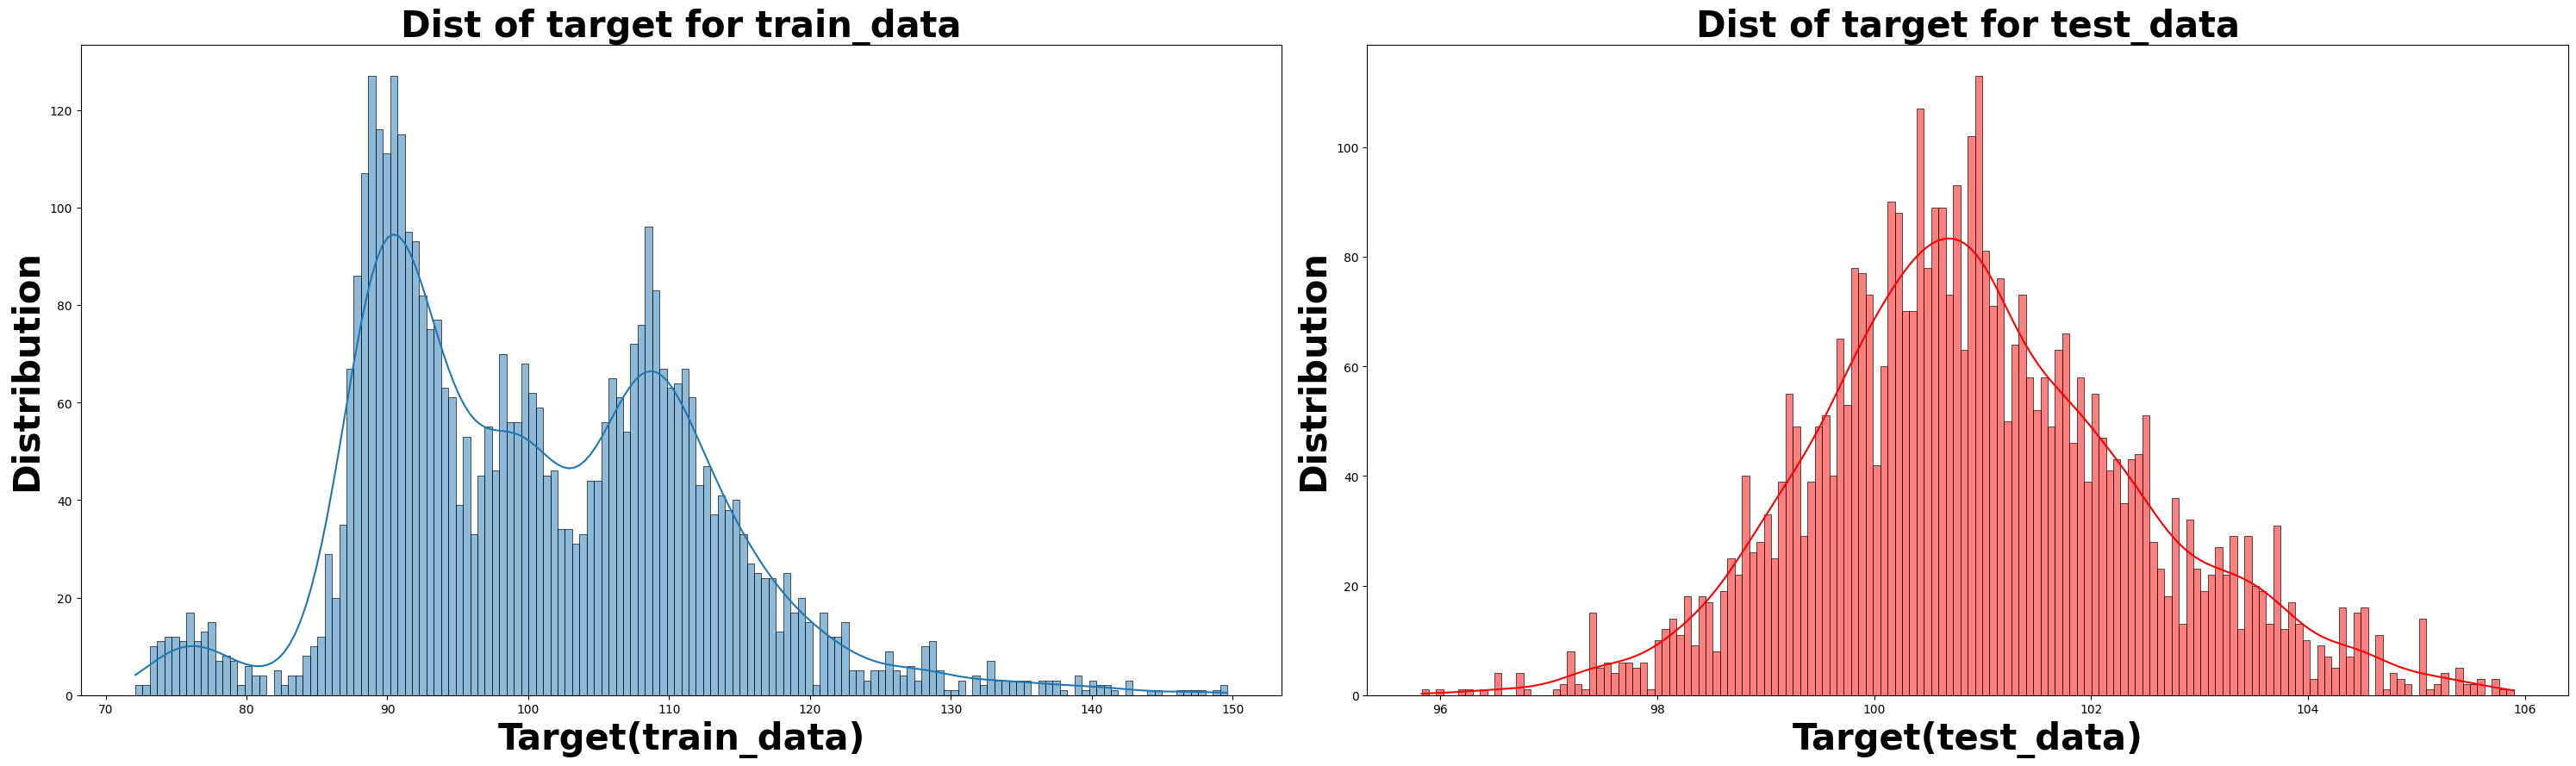

In [136]:
fig,ax=plt.subplots(1,2,figsize=(30,9))
# Changed sns.catplot to sns.histplot to handle 'bins' and 'kde' arguments
train_plot=sns.histplot(train_data_target[train_data_target<150],bins=150,kde=True, ax=ax[0])
train_plot.set_xlabel('Target(train_data)',weight='bold',size=30)
train_plot.set_ylabel('Distribution',weight='bold',size=30)
train_plot.set_title('Dist of target for train_data',weight='bold',size=30)

# Changed sns.catplot to sns.histplot
test_plot=sns.histplot(test_pred[test_pred<150],bins=150,kde=True,ax=ax[1], color='red')
test_plot.set_xlabel('Target(test_data)',weight='bold',size=30) # Corrected x-axis label
test_plot.set_ylabel('Distribution',weight='bold',size=30)
test_plot.set_title('Dist of target for test_data',weight='bold',size=30) # Corrected the title setting

plt.tight_layout()